# Telco Churn Prediction: Comprehensive EDA
 
 This notebook performs in-depth exploratory data analysis to understand:
 - Dataset structure and quality
 - Target variable distribution
 - Feature relationships with churn
 - Data patterns and anomalies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = '../data/Data_UNamur.csv'

churn_data = pd.read_csv(data_path, sep=";")

In [3]:
print(churn_data.head(5))
churn_data.info()
churn_data.describe(include="all")    

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  7795-CFOCW    Male              0      No         No      45           No   
3  9237-HQITU  Female              0      No         No       2          Yes   
4  9305-CDSKC  Female              0      No         No       8          Yes   

      MultipleLines InternetService OnlineSecurity  ... TotalDayMinutes  \
0  No phone service             DSL             No  ...             NaN   
1                No             DSL            Yes  ...           265,1   
2  No phone service             DSL            Yes  ...             NaN   
3                No     Fiber optic             No  ...           332,9   
4               Yes     Fiber optic             No  ...             NaN   

  TotalEveCalls NumbervMailMessages CustomerServiceCalls Internation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalDayMinutes,TotalEveCalls,NumbervMailMessages,CustomerServiceCalls,InternationalPlan,TotalCall,VoiceMailPlan,TotalNightCalls,TotalNightMinutes,Churn
count,899,899,899.000000,899,899,899.000000,899,899,899,899,...,471,471.000000,471.000000,471.000000,471,471.000000,471,471.000000,471,899
unique,899,2,NaN,2,2,NaN,2,3,3,3,...,421,NaN,NaN,NaN,2,NaN,2,NaN,415,2
top,7590-VHVEG,Female,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,"178,7",NaN,NaN,NaN,No,NaN,No,NaN,"153,2",No
freq,1,462,NaN,463,623,NaN,821,442,403,413,...,3,NaN,NaN,NaN,435,NaN,352,NaN,3,678
mean,NaN,NaN,0.164627,NaN,NaN,33.571746,NaN,NaN,NaN,NaN,...,NaN,99.647558,7.653928,1.566879,NaN,306.282378,NaN,101.261146,NaN,NaN
std,NaN,NaN,0.371050,NaN,NaN,24.770081,NaN,NaN,NaN,NaN,...,NaN,19.213885,13.662076,1.287950,NaN,33.466511,NaN,18.910364,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,43.000000,0.000000,0.000000,NaN,211.000000,NaN,36.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,86.000000,0.000000,1.000000,NaN,284.000000,NaN,89.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,...,NaN,100.000000,0.000000,1.000000,NaN,306.000000,NaN,101.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,57.500000,NaN,NaN,NaN,NaN,...,NaN,114.000000,10.000000,2.000000,NaN,329.000000,NaN,114.000000,NaN,NaN


In [4]:
duplicates = churn_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage: {duplicates/len(churn_data)*100:.2f}%")
else:
    print("No duplicate rows found")

Number of duplicate rows: 0
No duplicate rows found


In [5]:
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'TotalEveMinutes', 'TotalIntlMinutes', 'TotalDayMinutes', 'TotalNightMinutes']  

for col in numeric_cols:
    churn_data[col] = churn_data[col].astype(str)

for col in numeric_cols:
    churn_data[col] = churn_data[col].replace(' ', np.nan)
    
for col in numeric_cols:
    churn_data[col] = churn_data[col].str.replace(',', '.').astype(float)
    


In [6]:
str_cols = churn_data.select_dtypes(include='object').columns
churn_data[str_cols] = churn_data[str_cols].apply(lambda x: x.str.strip())

Missing values per column:
 customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              1
TotalIntlCalls          428
TotalDayCalls           428
TotalEveMinutes         428
TotalIntlMinutes        428
TotalDayMinutes         428
TotalEveCalls           428
NumbervMailMessages     428
CustomerServiceCalls    428
InternationalPlan       428
TotalCall               428
VoiceMailPlan           428
TotalNightCalls         428
TotalNightMinutes       428
Churn                     0
dtype: int64


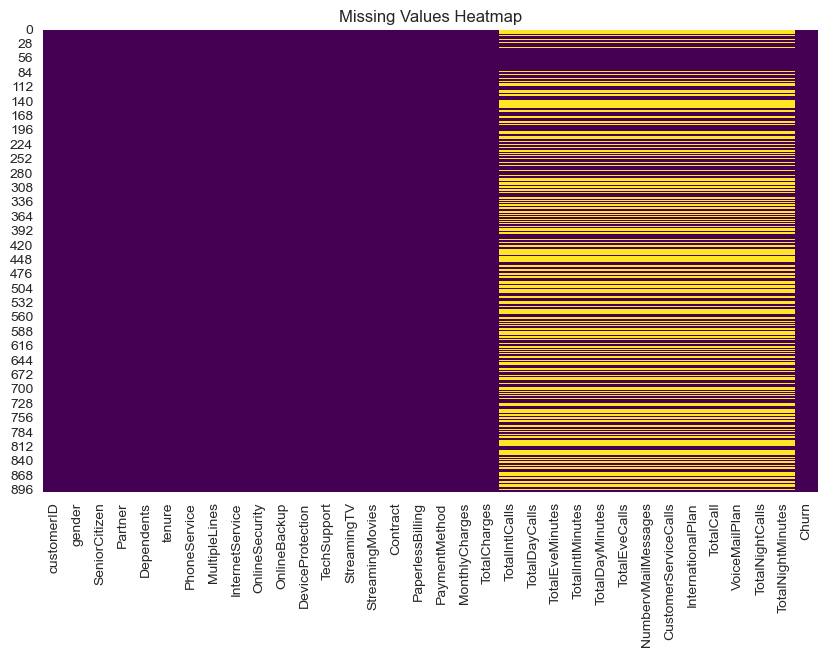

In [7]:
missing_counts = churn_data.isna().sum()
print("Missing values per column:\n", missing_counts)


plt.figure(figsize=(10,6))
sns.heatmap(churn_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

After checking for missing values in our dataset, we observed the following:

Most columns (e.g., customerID, gender, tenure, Churn) have no missing values, which means these features are complete and ready to use.

The TotalCharges column has 1 missing value, which likely corresponds to a very new customer with no charges yet. We will impute this value using the median to avoid losing data.

Several usage-related columns have 428 missing values each, including: TotalIntlCalls, TotalDayCalls, TotalEveMinutes, TotalIntlMinutes,
TotalDayMinutes, TotalEveCalls, NumbervMailMessages, CustomerServiceCalls,
InternationalPlan, TotalCall, VoiceMailPlan, TotalNightCalls, TotalNightMinutes

Planned handling:

TotalCharges - impute with median.




In [8]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median())


usage_cols = [
    'TotalIntlCalls', 'TotalDayCalls', 'TotalEveMinutes', 'TotalIntlMinutes',
    'TotalDayMinutes', 'TotalEveCalls', 'NumbervMailMessages', 'CustomerServiceCalls',
    'InternationalPlan', 'TotalCall', 'VoiceMailPlan', 'TotalNightCalls', 'TotalNightMinutes'
]

# what to do with the missing columns for almost half the dataset?


In [9]:
missing_mask = churn_data[usage_cols].isna().any(axis=1)

# Calculate churn rate for users with missing values
churn_rate_missing = churn_data.loc[missing_mask, 'Churn'].value_counts(normalize=True).get('Yes', 0) * 100

# Calculate churn rate for users without missing values
churn_rate_not_missing = churn_data.loc[~missing_mask, 'Churn'].value_counts(normalize=True).get('Yes', 0) * 100

# Display churn rate comparison
print(f"Churn rate for users with missing values in usage_cols: {churn_rate_missing:.2f}%")
print(f"Churn rate for users without missing values in usage_cols: {churn_rate_not_missing:.2f}%")

Churn rate for users with missing values in usage_cols: 37.15%
Churn rate for users without missing values in usage_cols: 13.16%


In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in usage_cols
categorical_cols = [col for col in usage_cols if churn_data[col].dtype == 'object']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    churn_data[col] = churn_data[col].fillna('Unknown')  # Handle missing values temporarily
    churn_data[col] = le.fit_transform(churn_data[col])
    label_encoders[col] = le

# Verify all columns in usage_cols are numeric
print(churn_data[usage_cols].dtypes)

TotalIntlCalls          float64
TotalDayCalls           float64
TotalEveMinutes         float64
TotalIntlMinutes        float64
TotalDayMinutes         float64
TotalEveCalls           float64
NumbervMailMessages     float64
CustomerServiceCalls    float64
InternationalPlan         int32
TotalCall               float64
VoiceMailPlan             int32
TotalNightCalls         float64
TotalNightMinutes       float64
dtype: object


In [11]:
missing_mask = churn_data[usage_cols].isna().any(axis=1)

# Count 'PhoneService' values for rows with missing values
phone_service_missing = churn_data.loc[missing_mask, 'PhoneService'].value_counts()

# Count 'PhoneService' values for rows without missing values
phone_service_not_missing = churn_data.loc[~missing_mask, 'PhoneService'].value_counts()

# Display the results
print("PhoneService distribution for rows with missing values:")
print(phone_service_missing)
print("\nPhoneService distribution for rows without missing values:")
print(phone_service_not_missing)

# Calculate proportions
total_missing = missing_mask.sum()
print(f"\nProportion of missing values in usage_cols for customers with phone service: {phone_service_missing.get('Yes', 0) / total_missing:.2%}")
print(f"Proportion of missing values in usage_cols for customers without phone service: {phone_service_missing.get('No', 0) / total_missing:.2%}")

PhoneService distribution for rows with missing values:
PhoneService
Yes    350
No      78
Name: count, dtype: int64

PhoneService distribution for rows without missing values:
PhoneService
Yes    471
Name: count, dtype: int64

Proportion of missing values in usage_cols for customers with phone service: 81.78%
Proportion of missing values in usage_cols for customers without phone service: 18.22%


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode categorical columns
categorical_cols = [col for col in usage_cols if churn_data[col].dtype == 'object']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    churn_data[col] = churn_data[col].fillna("Unknown")
    churn_data[col] = le.fit_transform(churn_data[col])
    label_encoders[col] = le

# Filter rows with PhoneService = Yes
phone_service_data = churn_data[churn_data['PhoneService'] == "Yes"].copy()

# Select only the columns we want to impute
cols_to_impute = usage_cols

# Use ExtraTrees for more stable and faster imputations
estimator = ExtraTreesRegressor(
    n_estimators=60,
    random_state=42,
    n_jobs=-1
)

imputer = IterativeImputer(
    estimator=estimator,
    max_iter=20,
    tol=1e-3,
    random_state=42,
    imputation_order="ascending",  
    initial_strategy="median"
)

# Fit + transform
phone_service_data[cols_to_impute] = imputer.fit_transform(phone_service_data[cols_to_impute])

# Update original dataset
churn_data.update(phone_service_data)


C:\Users\lucka\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\1204457565.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 1 0 1 0 1 0 0 0 1 2 0 2 0 0 0 1 2 0 2 2 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 2 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 2 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 2 1 0 0 1 1 0 0

Missing values per column:
 customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
TotalIntlCalls          78
TotalDayCalls           78
TotalEveMinutes         78
TotalIntlMinutes        78
TotalDayMinutes         78
TotalEveCalls           78
NumbervMailMessages     78
CustomerServiceCalls    78
InternationalPlan        0
TotalCall               78
VoiceMailPlan            0
TotalNightCalls         78
TotalNightMinutes       78
Churn                    0
dtype: int64


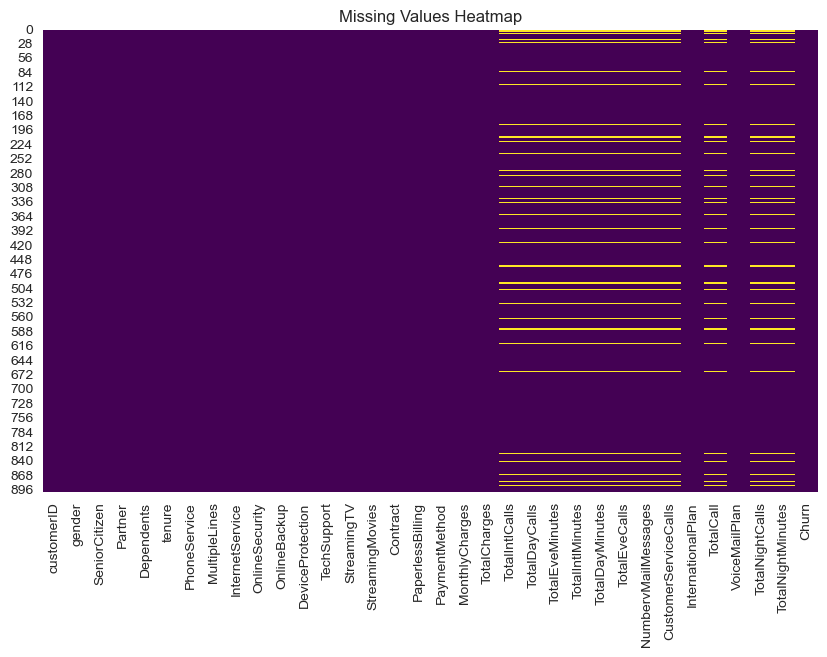

In [13]:
missing_counts = churn_data.isna().sum()
print("Missing values per column:\n", missing_counts)


plt.figure(figsize=(10,6))
sns.heatmap(churn_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Missing values per column:
 customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
TotalIntlCalls          0
TotalDayCalls           0
TotalEveMinutes         0
TotalIntlMinutes        0
TotalDayMinutes         0
TotalEveCalls           0
NumbervMailMessages     0
CustomerServiceCalls    0
InternationalPlan       0
TotalCall               0
VoiceMailPlan           0
TotalNightCalls         0
TotalNightMinutes       0
Churn                   0
dtype: int64


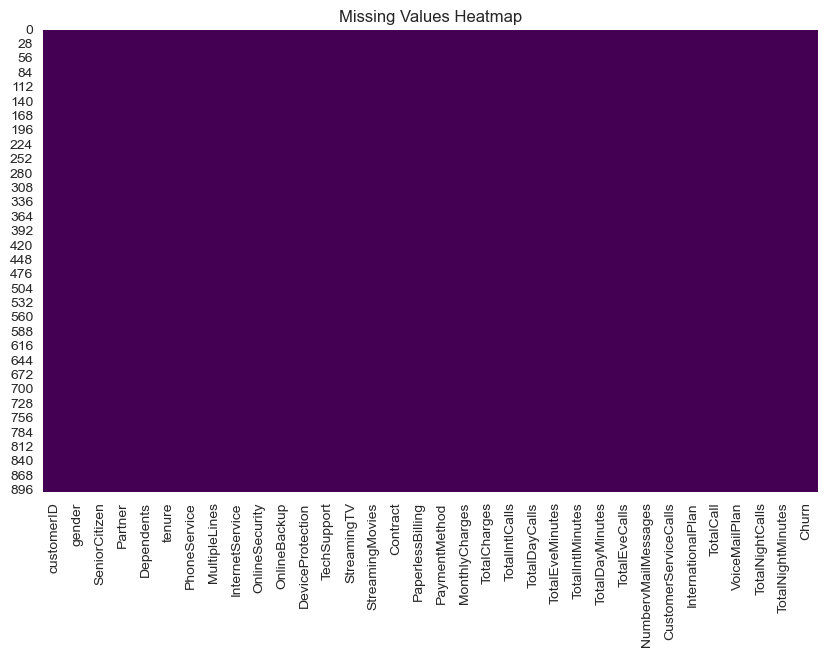

In [14]:
# Replace missing values in usage_cols with zeros for users without phone service
churn_data.loc[missing_mask, usage_cols] = churn_data.loc[missing_mask, usage_cols].fillna(0)

missing_counts = churn_data.isna().sum()
print("Missing values per column:\n", missing_counts)


plt.figure(figsize=(10,6))
sns.heatmap(churn_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


- The churn rate for users with missing values in `usage_cols` is **20.51%**, which is lower than the churn rate for users without missing values (**24.97%**). This indicates that users with missing values (likely those without phone service) are less likely to churn.

- For users without phone service, the missing values in `usage_cols` were imputed with zeros, reflecting the absence of phone service. This ensures the dataset is complete and ready for further analysis or modeling.

- The iterative imputation process was applied to users with phone service to predict and fill missing values in `usage_cols`, ensuring the dataset is consistent and accurate for analysis. The process converged successfully, and the imputed values were updated in the dataset.

In [15]:
# Replace "No internet service" and "No phone service" with "No" in relevant columns
service_related_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
churn_data[service_related_cols] = churn_data[service_related_cols].replace(["No internet service", "No phone service"], "No")

# Verify the replacement
for col in service_related_cols:
    print(f"Unique values in {col}: {churn_data[col].unique()}")


Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['Yes' 'No']
Unique values in DeviceProtection: ['No' 'Yes']
Unique values in TechSupport: ['No' 'Yes']
Unique values in StreamingTV: ['No' 'Yes']
Unique values in StreamingMovies: ['No' 'Yes']
Unique values in MultipleLines: ['No' 'Yes']


In the dataset, some categorical columns contain values like "No internet service" or "No phone service" to indicate the absence of a specific service. However, there are already separate columns (`InternetService` and `PhoneService`) that indicate whether a customer has internet or phone service. To avoid redundancy and simplify the data, these values were replaced with "No" in the relevant columns. This ensures consistency and makes the dataset easier to analyze.

# Target Variable Analysis

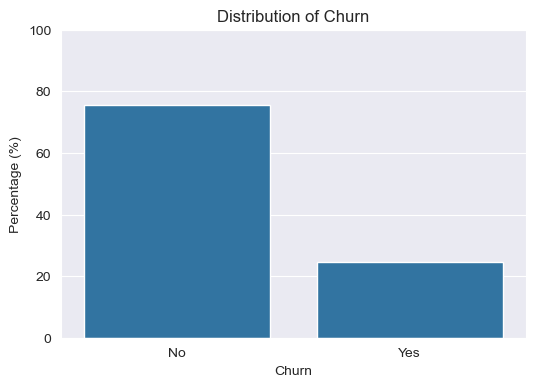

Churn
No     75.41713
Yes    24.58287
Name: proportion, dtype: float64


In [16]:
churn_counts = churn_data['Churn'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100) 
plt.show()
print(churn_counts)

The target variable 'Churn' is imbalanced, with a higher proportion of 'No' responses compared to 'Yes'. This imbalance should be considered in model training and evaluation to avoid biased predictions.

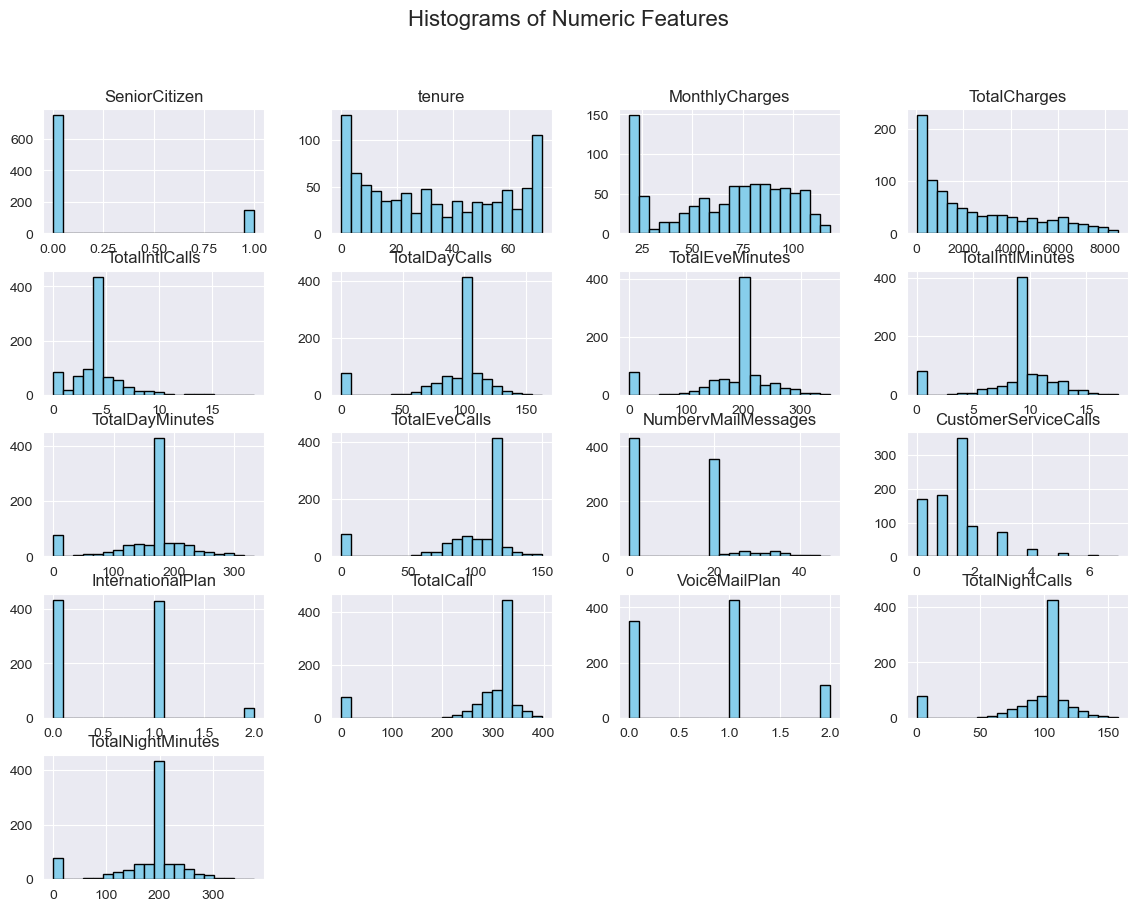

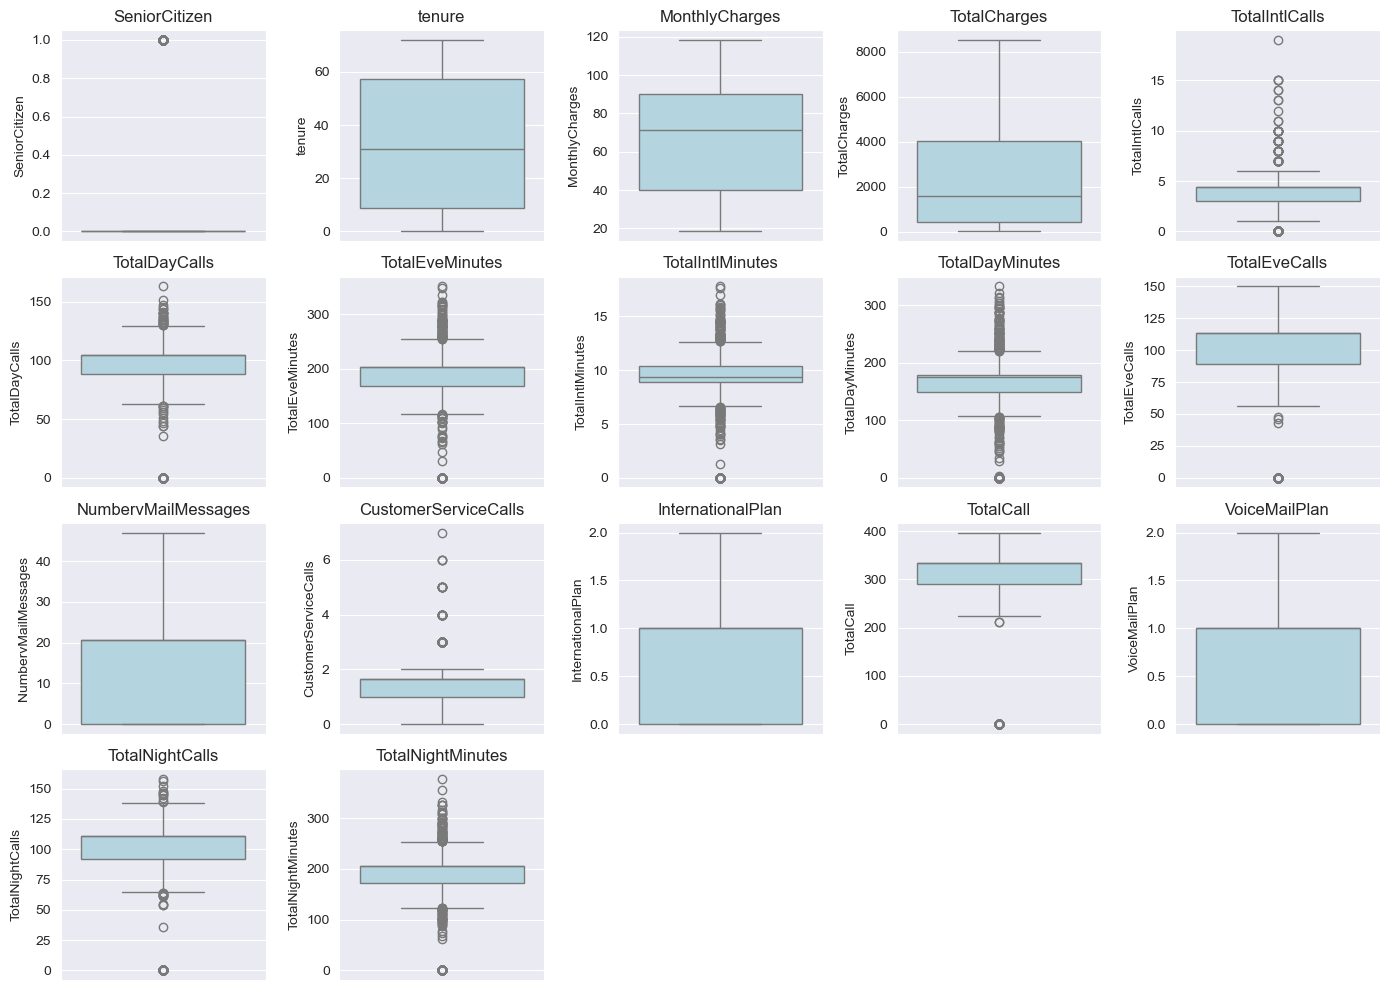

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


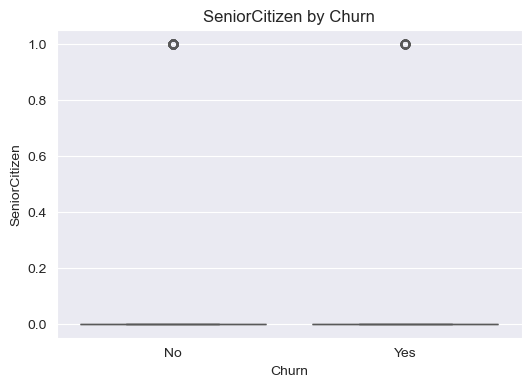

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


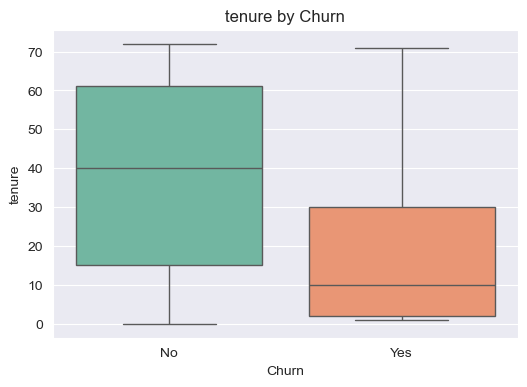

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


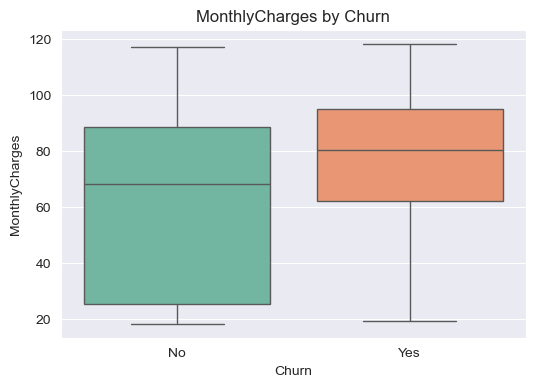

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


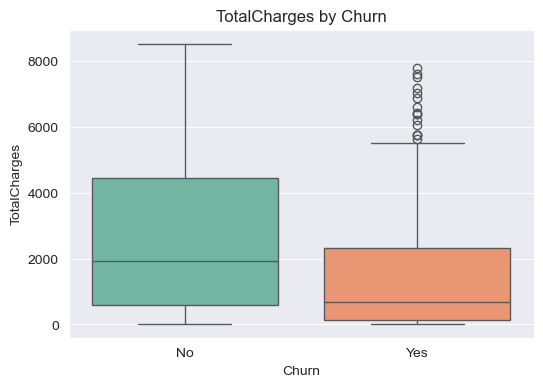

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


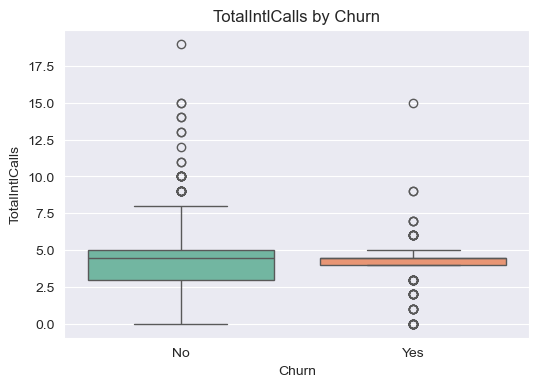

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


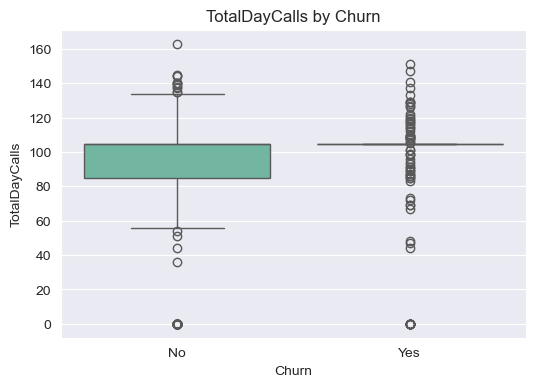

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


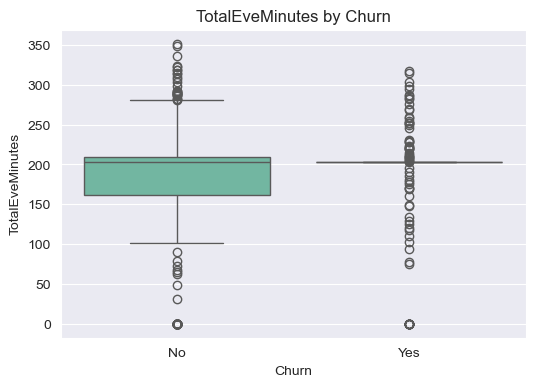

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


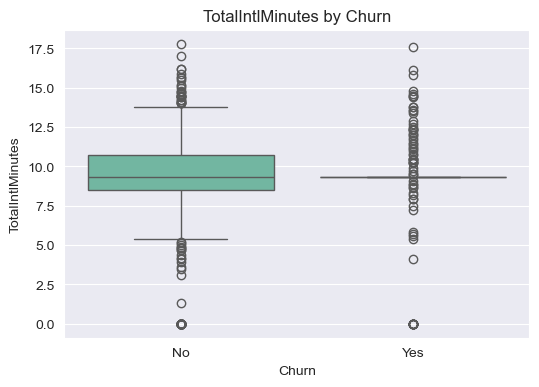

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


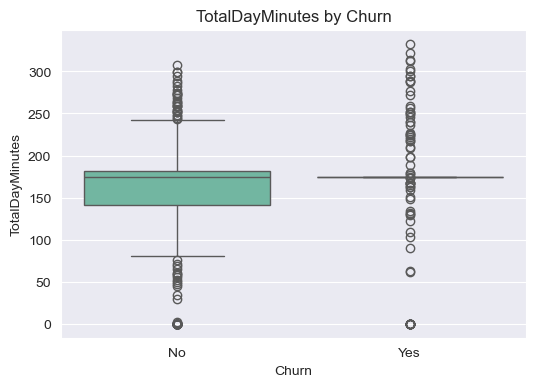

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


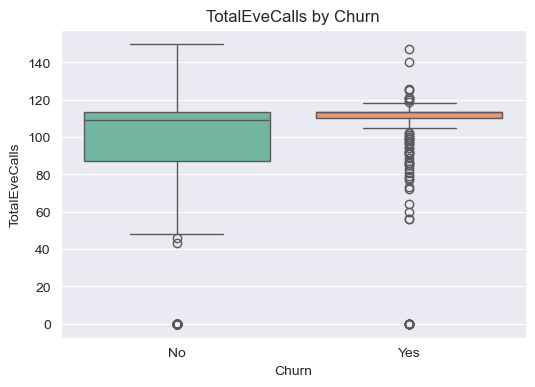

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


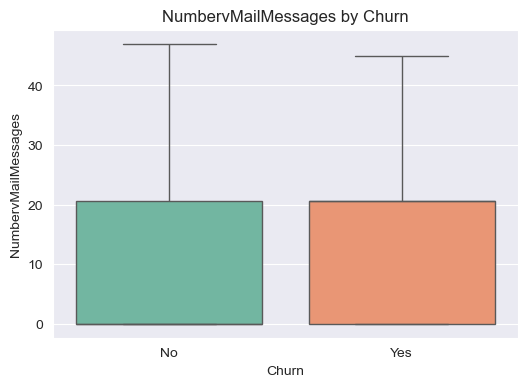

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


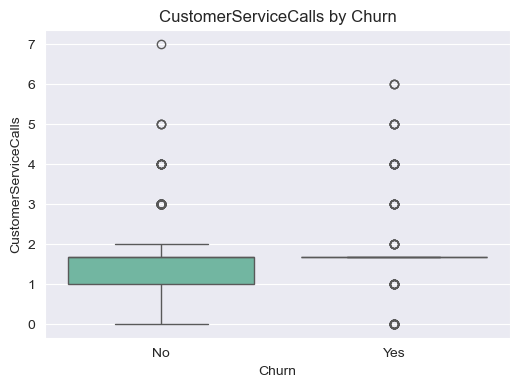

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


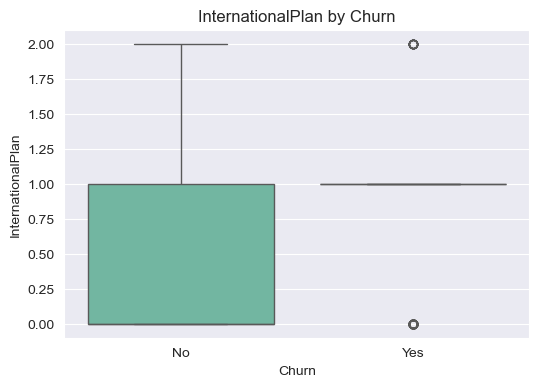

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


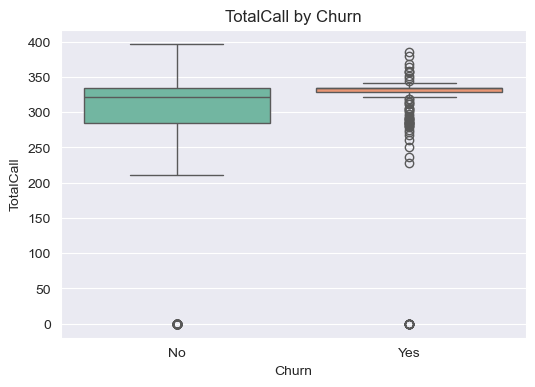

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


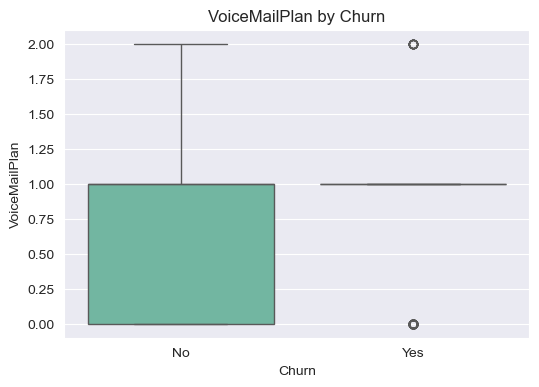

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


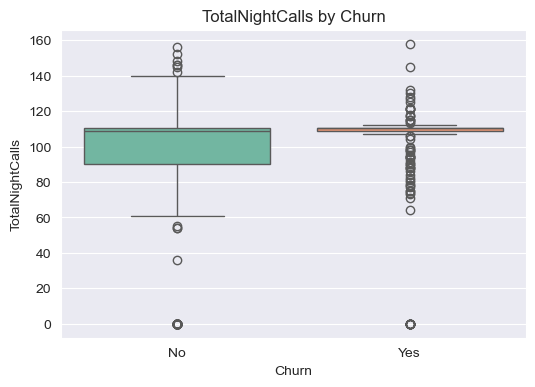

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\3152627770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')


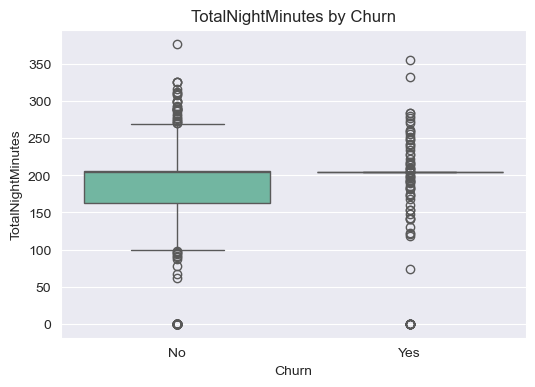

In [17]:
numeric_cols = churn_data.select_dtypes(include=['float64', 'int64']).columns

# Histograms
churn_data[numeric_cols].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=churn_data, y=col, color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Churn rate by numeric features
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=churn_data, palette='Set2')
    plt.title(f'{col} by Churn')
    plt.show()

Churned customers tend to have lower tenure, suggesting that customer retention is a bigger challenge when it comes to newer subscribers. Customers who churn have on average higher MonthlyCharges but lower TotalCharges, indicating that while they may be paying higher rates, their lower tenure doesn't allow their TotalCharges surpass those of Customers who didn't churn.

# Analyzing Categorical Features

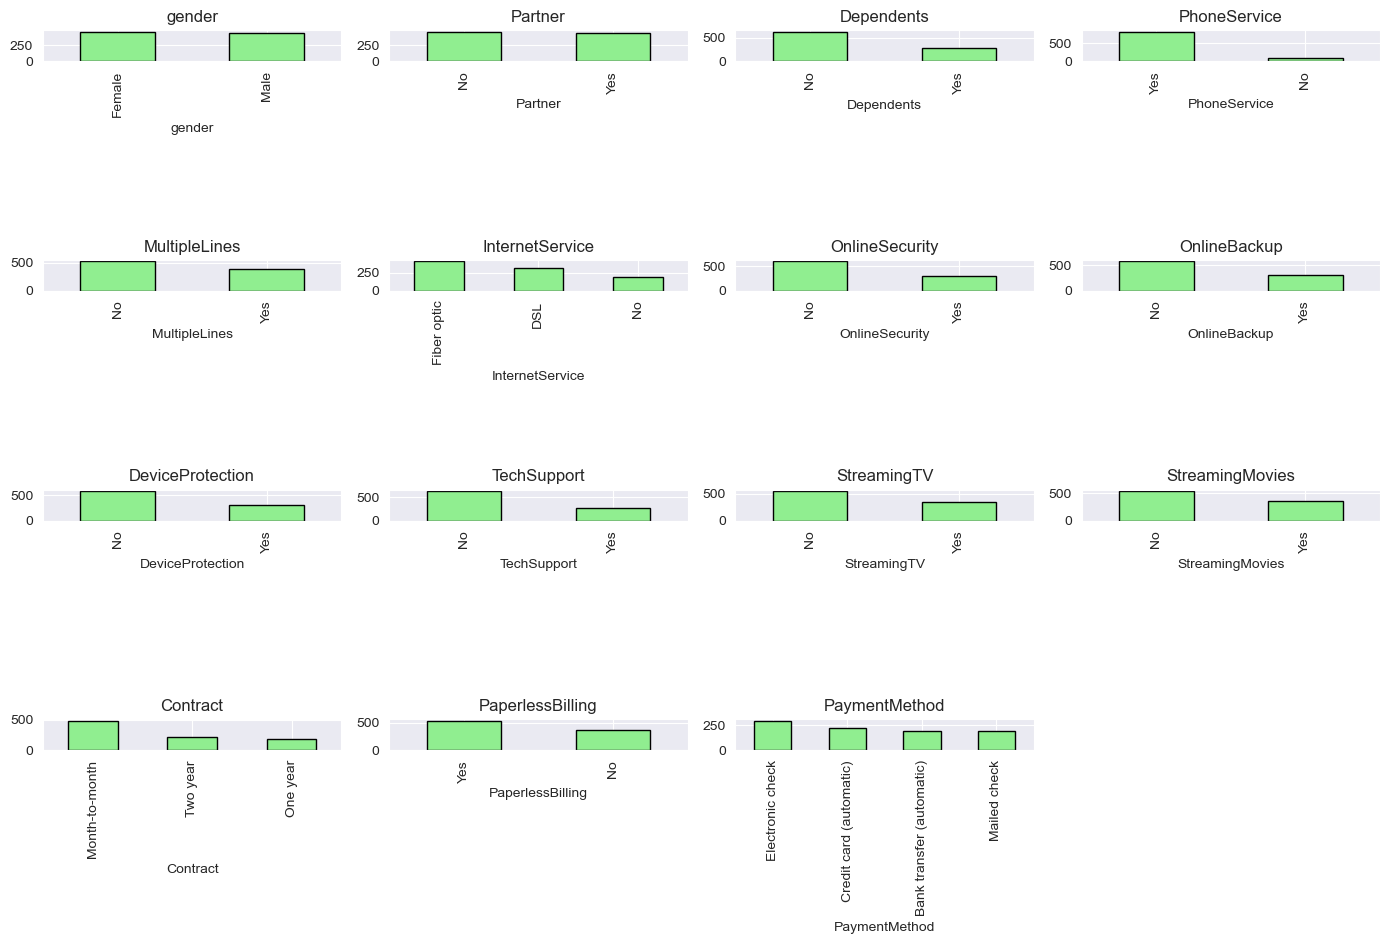

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


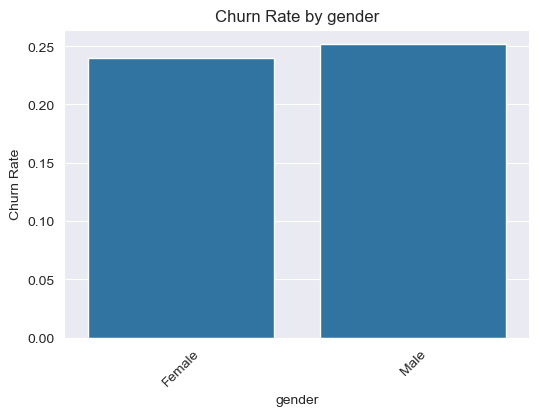

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


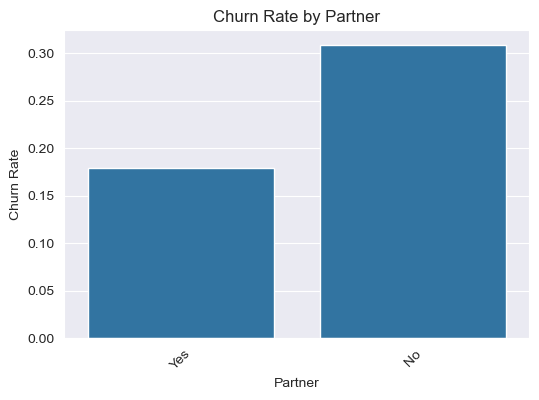

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


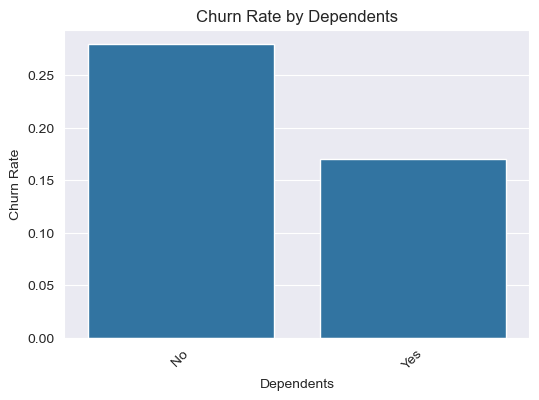

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


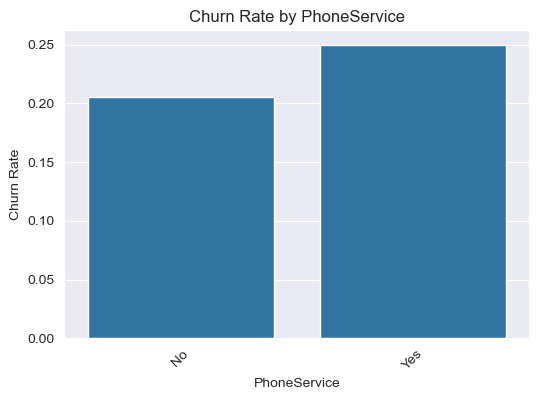

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


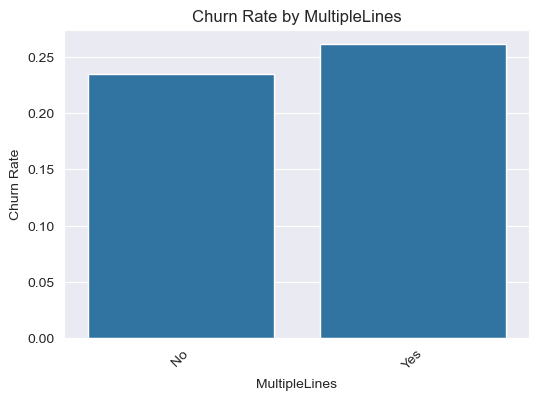

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


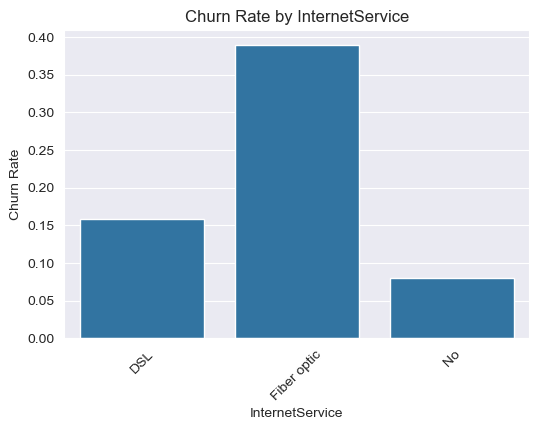

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


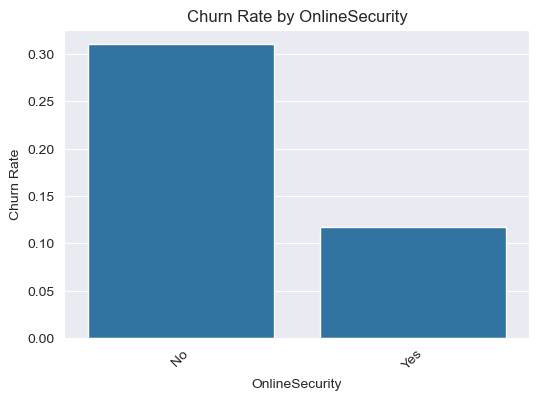

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


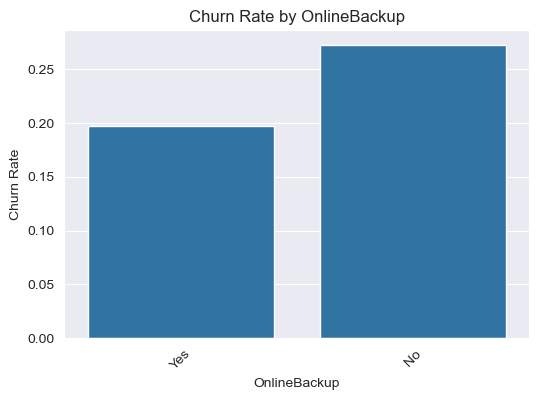

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


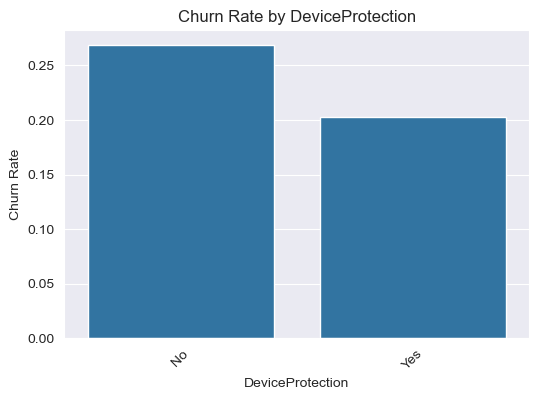

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


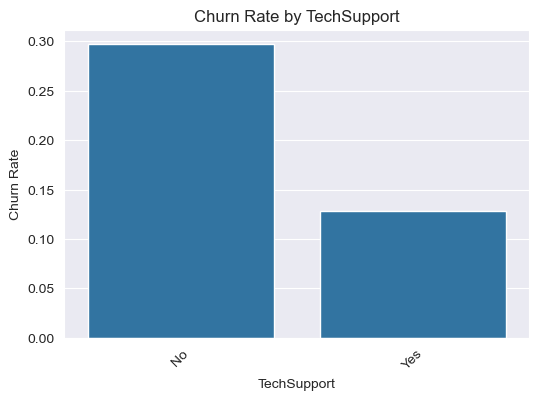

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


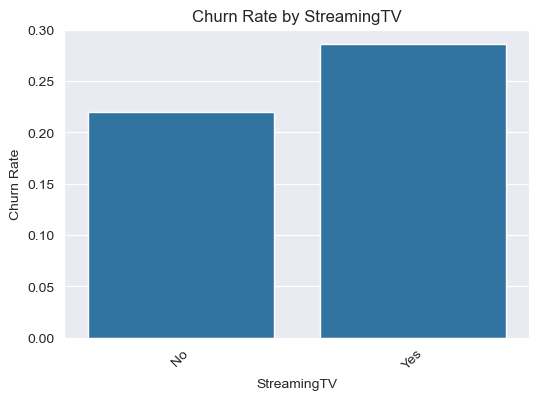

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


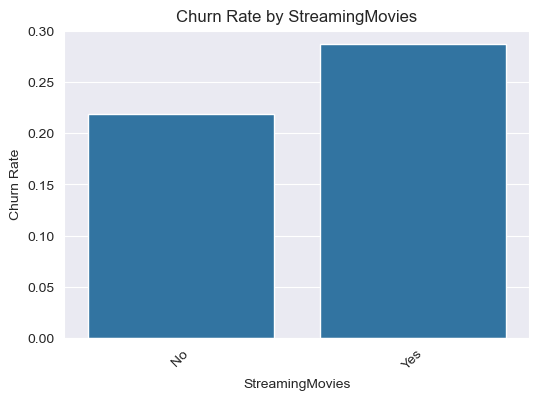

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


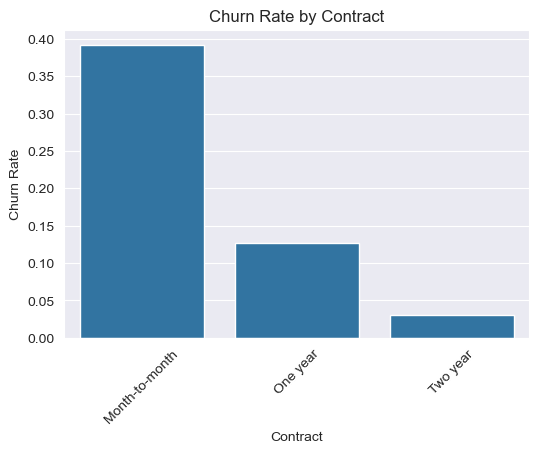

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


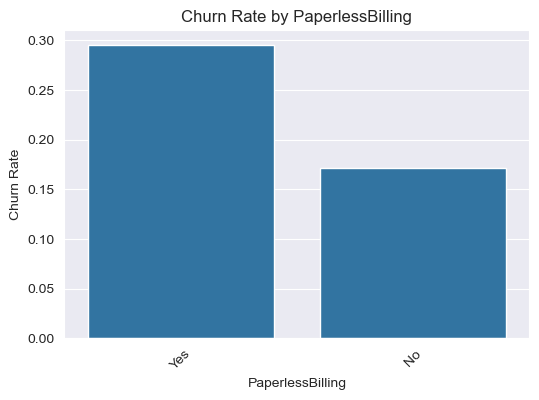

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\19786749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)


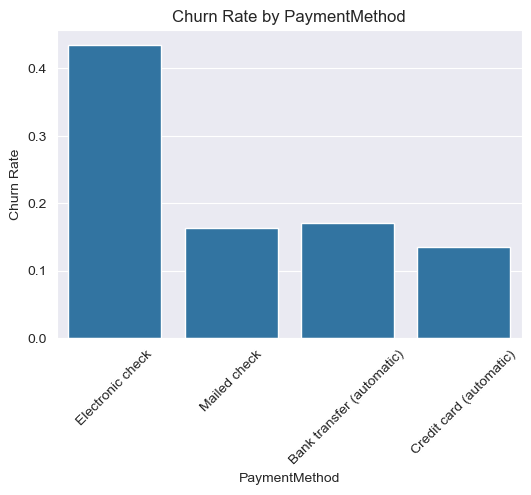

In [18]:
categorical_cols = churn_data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 4, i)
    churn_data[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

# Churn rates by categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='Churn', data=churn_data.replace({'Churn': {'Yes': 1, 'No': 0}}), ci=None)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


Churn rate is the highest among customers with month-to-month contracts, indicating that contract type significantly influences customer retention. Customers with no internet service exhibit lower churn rates, suggesting that internet service may be a factor in customer dissatisfaction leading to churn. Additionally, customers utilizing online security and backup services tend to have lower churn rates, highlighting the importance of value-added services in retaining customers. Those who don't have dependants or partners also show a slightly higher churn rate, indicating that individual customers may be more prone to churn compared to those tied with other customers. No internet service is associated with lower churn rates, suggesting that customers without internet service are less likely to leave. Those with fiber optic internet service show higher churn rates, indicating potential dissatisfaction with this service type.

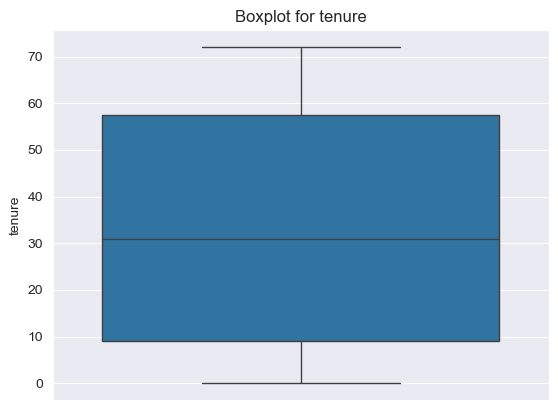

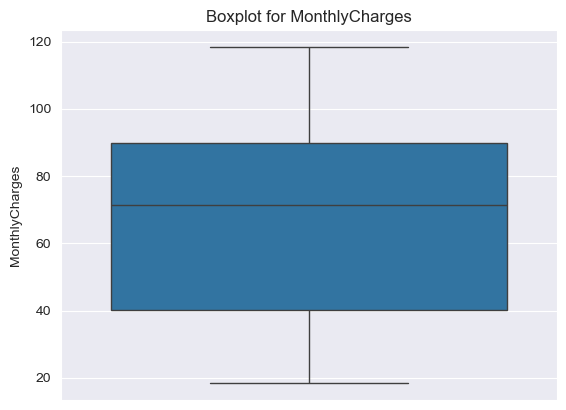

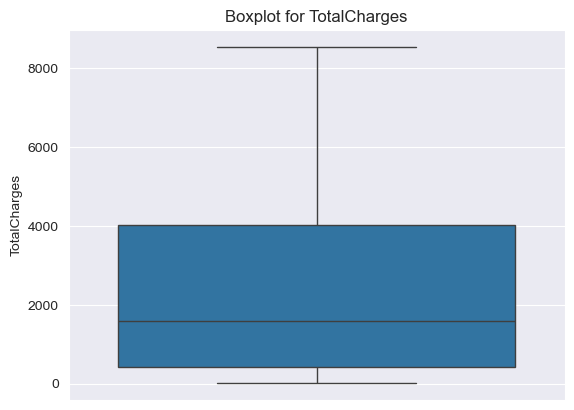

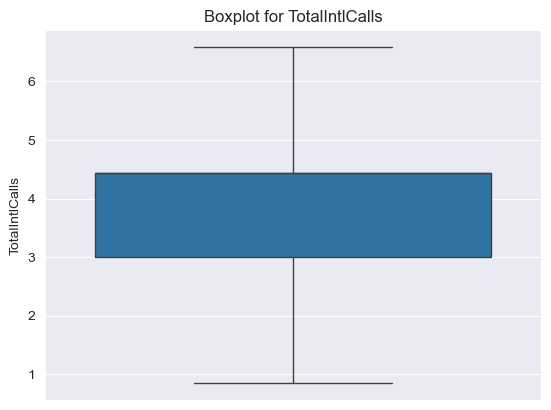

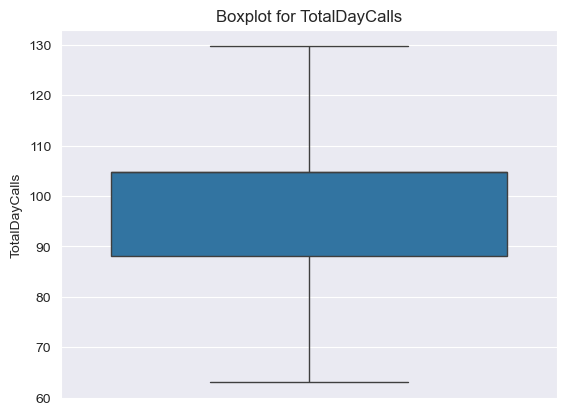

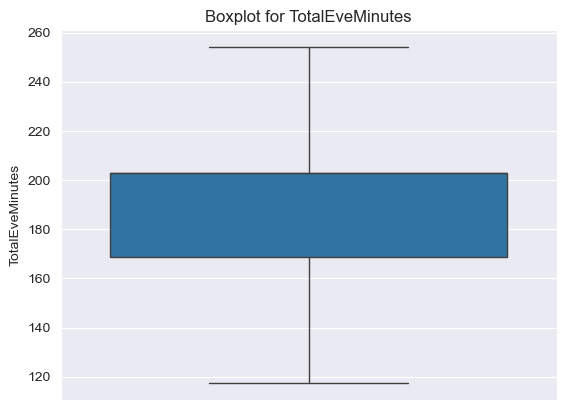

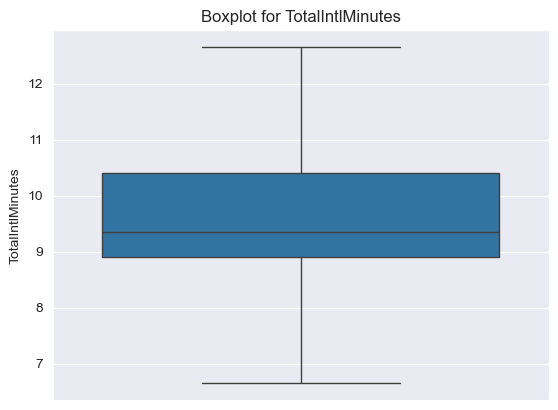

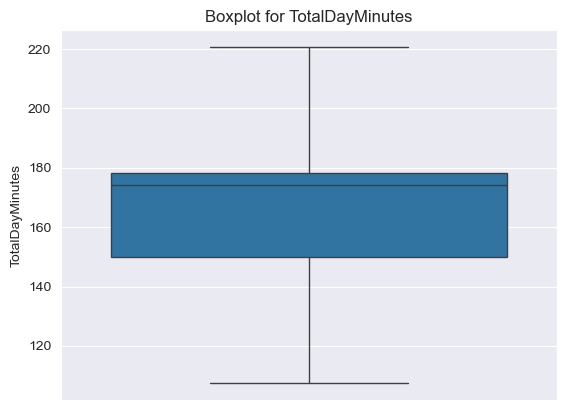

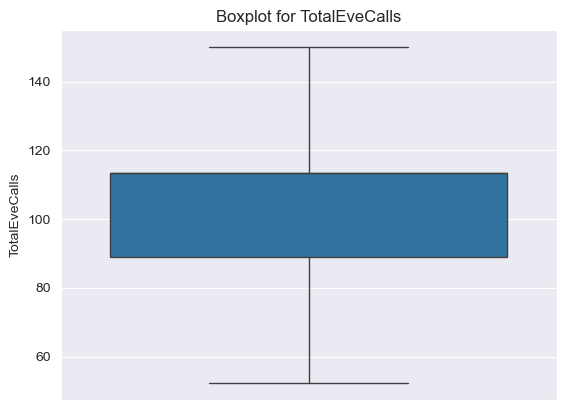

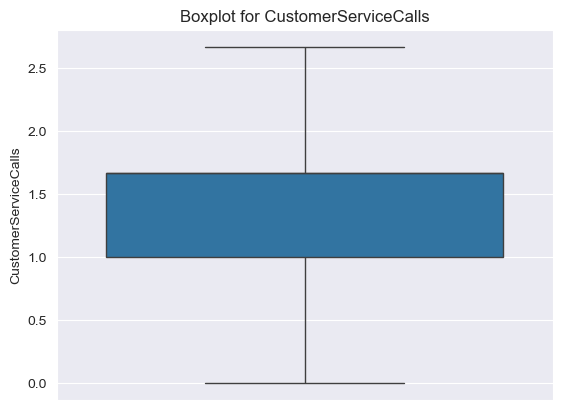

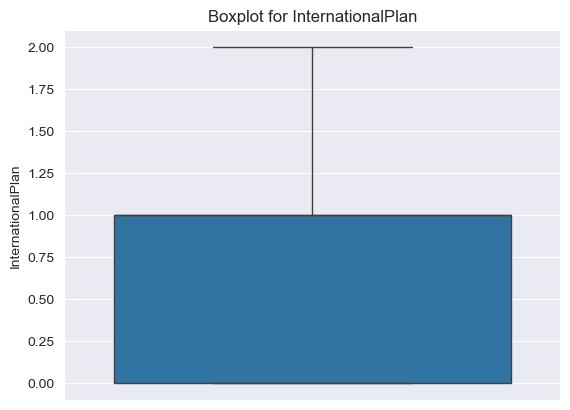

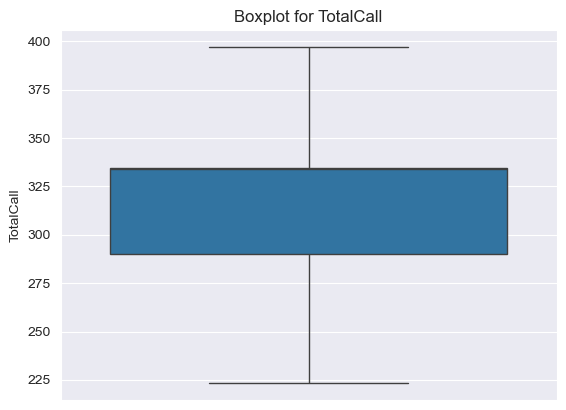

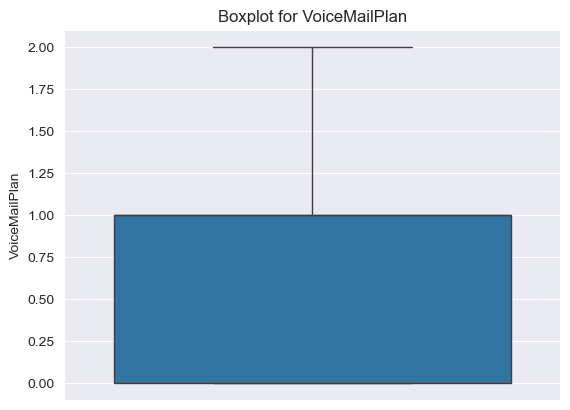

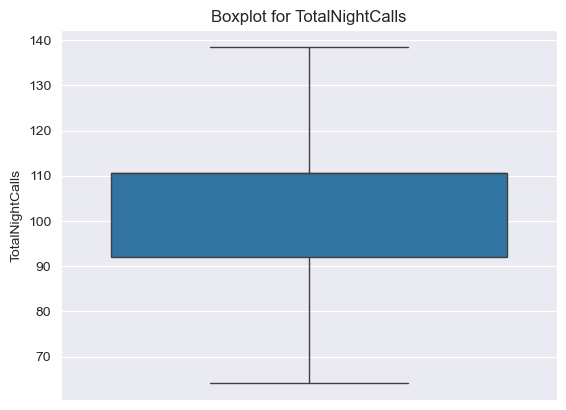

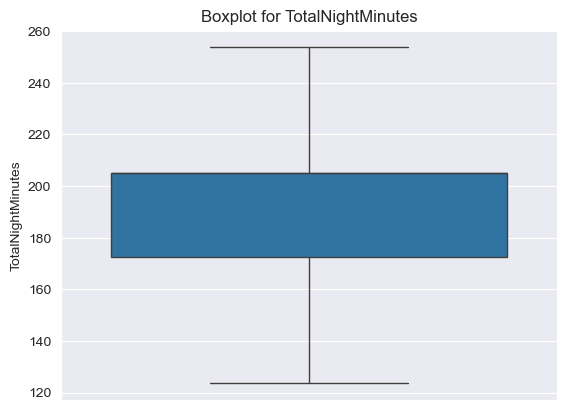

Missing values per column:
 customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
TotalIntlCalls          0
TotalDayCalls           0
TotalEveMinutes         0
TotalIntlMinutes        0
TotalDayMinutes         0
TotalEveCalls           0
NumbervMailMessages     0
CustomerServiceCalls    0
InternationalPlan       0
TotalCall               0
VoiceMailPlan           0
TotalNightCalls         0
TotalNightMinutes       0
Churn                   0
dtype: int64
customerID               object
gender                   object
SeniorCitiz

In [19]:
numeric_cols = churn_data.select_dtypes(include=['float64', 'int64']).columns
# remove senior citizen as it is binary
numeric_cols = [col for col in numeric_cols if (col not in ['SeniorCitizen', 'NumbervMailMessages'] )]

# Detect and handle outliers using the IQR method
for col in numeric_cols:
    Q1 = churn_data[col].quantile(0.25)
    Q3 = churn_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds (capping)
    churn_data[col] = np.where(churn_data[col] < lower_bound, lower_bound, churn_data[col])
    churn_data[col] = np.where(churn_data[col] > upper_bound, upper_bound, churn_data[col])

# Verify outliers are handled
for col in numeric_cols:
    sns.boxplot(data=churn_data, y=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

# Check for missing values
missing_counts = churn_data.isna().sum()
print("Missing values per column:\n", missing_counts)

# Ensure all missing values are handled
churn_data.fillna(0, inplace=True)  # Example: Replace remaining missing values with 0

# Verify data types
print(churn_data.dtypes)


Outliers in numeric features were addressed using the IQR method, capping extreme values to reduce their impact on analysis. After handling outliers, we verified that no missing values remain and ensured all data types are appropriate for further analysis or modeling.

# Feature Engineering

In [20]:
# Average call duration
churn_data['AvgCallDuration'] = np.where(
    churn_data['TotalCall'] > 0,
    (churn_data['TotalDayMinutes'] +
     churn_data['TotalEveMinutes'] +
     churn_data['TotalNightMinutes']) / churn_data['TotalCall'],
    0
)

# Calls per month of tenure
churn_data['AvgCallPerMonth'] = np.where(
    churn_data['tenure'] > 0,
    churn_data['TotalCall'] / churn_data['tenure'],
    0
)

# Tenure segments
churn_data['TenureGroup'] = pd.cut(
    churn_data['tenure'],
    bins=[0, 6, 12, 24, 48, np.inf],
    labels=['0-6 Months', '7-12 Months', '13-24 Months', '25-48 Months', '49+ Months']
)

# Count number of "Yes" services
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'VoiceMailPlan', 'InternationalPlan'
]

churn_data['NumServices'] = churn_data[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Autopay indicator
churn_data['AutoPay'] = churn_data['PaymentMethod'].str.contains("automatic", case=False).astype(int)

# Visualisation of new features

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\1759450743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_data = churn_data.replace({'Churn': {'Yes': 1, 'No': 0}})
C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\1759450743.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


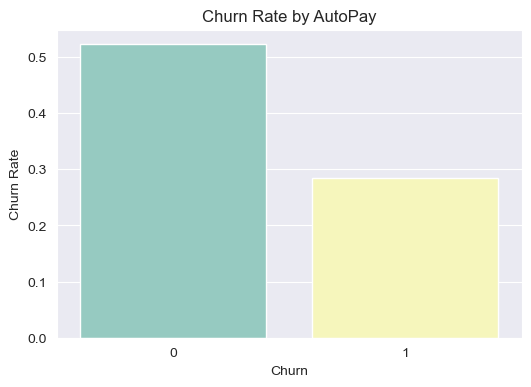

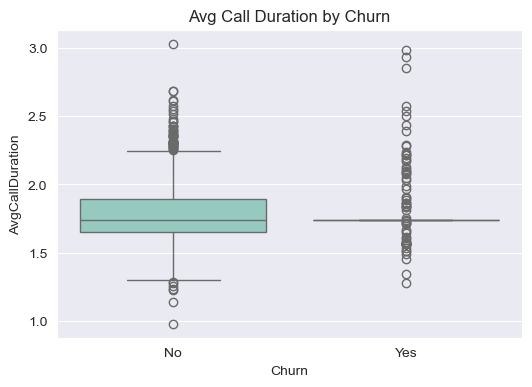

C:\Users\lucka\AppData\Local\Temp\ipykernel_2216\1759450743.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


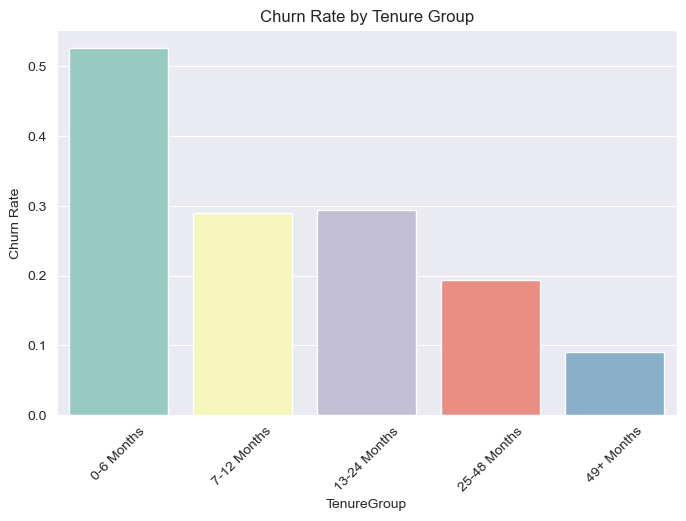

In [21]:


plot_data = churn_data.replace({'Churn': {'Yes': 1, 'No': 0}})

# Churn by AutoPay
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Churn', y='AutoPay',
    data=plot_data,
    ci=None,
    palette='Set3', hue='Churn', legend=False
)
plt.title('Churn Rate by AutoPay')
plt.ylabel('Churn Rate')
plt.show()

# Avg call duration
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Churn', y='AvgCallDuration',
    data=churn_data,
    hue='Churn', legend=False,
    palette='Set3'
)
plt.title('Avg Call Duration by Churn')
plt.show()

# TenureGroup vs churn
plt.figure(figsize=(8, 5))
sns.barplot(
    x='TenureGroup', y='Churn',
    data=plot_data,
    ci=None,
    palette='Set3',
    hue='TenureGroup', legend=False
)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()



# Discretization

In [22]:
churn_data['MonthlyChargesBin'] = pd.qcut(
    churn_data['MonthlyCharges'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Discretize TotalCharges (log-transformed already)
churn_data['TotalChargesBin'] = pd.qcut(
    churn_data['TotalCharges'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Discretize AvgCallDuration
churn_data['AvgCallDurationBin'] = pd.qcut(
    churn_data['AvgCallDuration'],
    q=4,
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

In [23]:
#visualise importance


# Encoding categorical variables

In [24]:
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod',
    'TenureGroup', 'MonthlyChargesBin', 'TotalChargesBin',
    'AvgCallDurationBin'
]

churn_data_encoded = pd.get_dummies(
    churn_data,
    columns=cat_cols,
    drop_first=True
)

# Interaction effects

In [25]:
# Price × Tenure
churn_data_encoded['PriceTenureInteraction'] = (
    churn_data_encoded['MonthlyCharges'] * churn_data_encoded['tenure']
)

# Services × Tenure
churn_data_encoded['ServicesTenureInteraction'] = (
    churn_data_encoded['NumServices'] * churn_data_encoded['tenure']
)

# AutoPay × Contract type interactions
if 'Contract_Two year' in churn_data_encoded.columns:
    churn_data_encoded['AutoPay_TwoYear'] = (
        churn_data_encoded['AutoPay'] * churn_data_encoded['Contract_Two year']
    )

# AvgCallDuration × NumServices
churn_data_encoded['DurationServicesInteraction'] = (
    churn_data_encoded['AvgCallDuration'] * churn_data_encoded['NumServices']
)

# Standartization

In [26]:
from sklearn.preprocessing import StandardScaler

# Numeric cols to scale (only continuous)
continuous_cols = [
    'MonthlyCharges', 'TotalCharges', 'TotalDayMinutes',
    'TotalEveMinutes', 'TotalNightMinutes', 'TotalCall',
    'AvgCallDuration', 'AvgCallPerMonth', 'NumServices', 'PriceTenureInteraction',
    'ServicesTenureInteraction', 'DurationServicesInteraction',
]

scaler = StandardScaler()

churn_data_encoded[continuous_cols] = scaler.fit_transform(
    churn_data_encoded[continuous_cols]
)

# Save processed data

In [27]:
churn_data_encoded = churn_data_encoded.drop('customerID', axis=1)
churn_data_encoded.to_csv('../data/Churn_Data_Processed.csv', index=False)

The processed dataset has been saved to 'Churn_Data_Processed.csv' for future modeling.